In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-implicit-ab4)

We study the convergence of AB4 using the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. As usual, `solve_ivp` is called to give an accurate reference solution.

In [2]:
from scipy.integrate import solve_ivp
du_dt = lambda t, u: sin((t + u)**2)
tspan = (0.0, 4.0)
u0 = [-1.0]
u_ref = solve_ivp(du_dt, tspan, u0, dense_output=True, rtol=1e-13, atol=1e-13).sol

Now we perform a convergence study of the AB4 code.

In [3]:
n = array([int(4 * 10**k) for k in linspace(0, 3, 7)])
err = []
results = PrettyTable(["n", "AB4 error"])
for k in range(len(n)):
    t, u = FNC.ab4(du_dt, tspan, u0, n[k])
    err.append( abs(u_ref(4)[0] - u[0][-1]) )
    results.add_row([n[k], err[-1]])

print(results)

+------+------------------------+
|  n   |       AB4 error        |
+------+------------------------+
|  4   |   0.5004401704518087   |
|  12  |   0.9739144270683646   |
|  40  | 2.2180676292116175e-05 |
| 126  | 3.9306304588926366e-07 |
| 400  | 4.561844235695389e-09  |
| 1264 | 4.791389507374788e-11  |
| 4000 | 5.426770144367765e-13  |
+------+------------------------+


The method should converge as $O(h^4)$, so a log-log scale is appropriate for the errors.

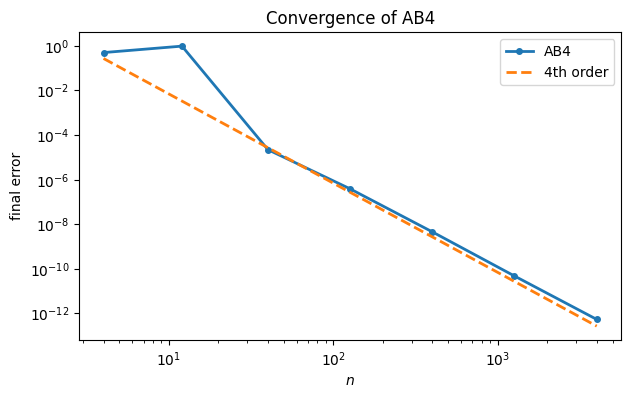

In [4]:
loglog(n, err, "-o", label="AB4")
loglog(n, 0.5 * err[-1] * (n / n[-1])**(-4), "--", label="4th order")

xlabel("$n$"),  ylabel("final error")
legend(), title("Convergence of AB4");